Converged at epoch 4
Training complete!
Epochs trained: 4
Final Weights: [0.1 0.1]
Final Bias: -0.10000000000000003

Testing the trained Perceptron:
Input: [0 0], True Label: 0, Predicted: 0 -> Correct
Input: [0 1], True Label: 0, Predicted: 0 -> Correct
Input: [1 0], True Label: 0, Predicted: 0 -> Correct
Input: [1 1], True Label: 1, Predicted: 1 -> Correct


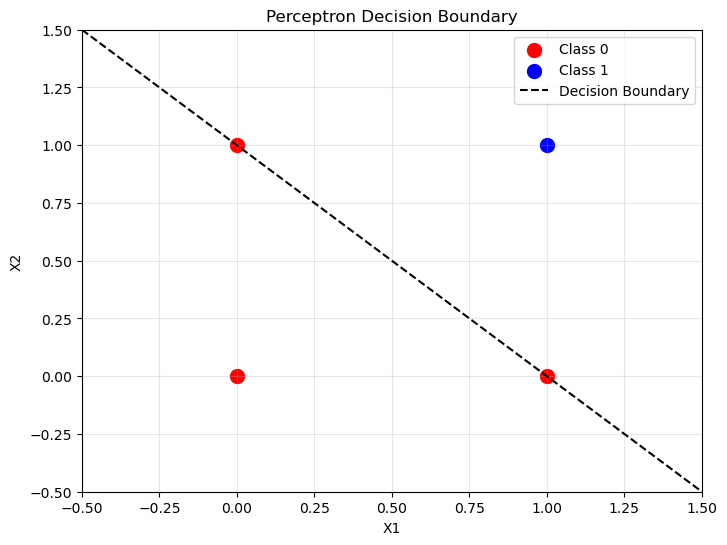

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class BatchPerceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        y_ = np.where(y > 0, 1, 0)

        for epoch in range(self.n_iterations):
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = self.tlu(linear_output)

            # Update weights and bias using vectorized operations
            errors = y_ - y_predicted

            # This is where linear algebra shines, updating weights for all features at once.
            # The key idea here is to use matrix operations to adjust the weights and bias
            # based on the errors of all instances in the batch simultaneously.
            
            # Calculate the dot product of the input features matrix X (transposed) and the error vector.
            # X.T is the transpose of the input matrix X, which means that each column of X becomes a row in X.T.
            # This operation effectively computes the sum of the errors for each feature across all instances,
            # scaled by the corresponding feature values. This sum is then used to update each weight.
            # The learning_rate determines the size of the update step.
            self.weights += self.learning_rate * np.dot(X.T, errors)
            
            # Update the bias by summing up all the errors and scaling by the learning rate.
            # The bias is a single value that is adjusted based on the total error across all instances.
            self.bias += self.learning_rate * np.sum(errors)

            if np.all(y_predicted == y_):
                print(f"Converged at epoch {epoch + 1}")
                return epoch + 1

        return self.n_iterations

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.tlu(linear_output)
        return y_predicted

    def tlu(self, x):
        return np.where(x >= 0, 1, 0)

# Sample data for demonstration (AND gate)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate truth table

# Create and train the Batch Perceptron
perceptron = BatchPerceptron(learning_rate=0.1, n_iterations=10)
epochs_trained = perceptron.fit(X, y)

# Print the final learned parameters
print("Training complete!")
print(f"Epochs trained: {epochs_trained}")
print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")

# Test the trained Perceptron
print("\nTesting the trained Perceptron:")
for inputs, label in zip(X, y):
    prediction = perceptron.predict(inputs.reshape(1, -1))
    print(f"Input: {inputs}, True Label: {label}, Predicted: {prediction[0]} "
          f"-> {'Correct' if label == prediction[0] else 'Incorrect'}")

# Optional: Visualize the decision boundary (for 2D data)
def plot_decision_boundary(X, y, perceptron):
    plt.figure(figsize=(8, 6))

    # Plot data points
    colors = ['red', 'blue']
    for i in range(2):
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=f'Class {i}', s=100)

    # Create decision boundary
    if perceptron.weights is not None:
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5

        # Decision boundary: w1*x1 + w2*x2 + bias = 0
        # Solve for x2: x2 = -(w1*x1 + bias) / w2
        if perceptron.weights[1] != 0:
            x_boundary = np.array([x_min, x_max])
            y_boundary = -(perceptron.weights[0] * x_boundary + perceptron.bias) / perceptron.weights[1]
            plt.plot(x_boundary, y_boundary, 'k--', label='Decision Boundary')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.show()

plot_decision_boundary(X, y, perceptron)
